# Do Playgrounds Affect Student Growth?

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('cps_progress_report_18.csv')
parks_df = pd.read_csv('parks.csv')
prof_df = pd.read_csv('cps_school_profile_2019.csv')


## The Data

### CPS Progress Report 2018-2019 School Year

In [19]:
df.head()

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,...,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,609869,LANGFORD,Anna R. Langford Community Academy,Neighborhood,ES,6010 S THROOP ST,Chicago,Illinois,60636,7.735359e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,610225,WHISTLER,John Whistler Elementary School,Neighborhood,ES,11533 S ADA ST,Chicago,Illinois,60643,7.735356e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,609734,TAFT HS,William Howard Taft High School,Neighborhood,HS,6530 W BRYN MAWR AVE,Chicago,Illinois,60631,7.735341e+09,...,45.6,45.6,56.4,56.4,28.0,28th,50.0,50th,34.0,34th
3,610588,RICHARDSON,Robert J. Richardson Middle School,Neighborhood,MS,6018 S KARLOV,Chicago,Illinois,60629,7.735359e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,609894,DRAKE,John B Drake Elementary School,Neighborhood,ES,2710 S DEARBORN ST,Chicago,Illinois,60616,7.735349e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Chicago Public Parks

In [20]:
parks_df.head()

,PARK NUMBER,PARK NAME,STREET ADDRESS,ZIP,ACRES,WARD,PARK CLASS,LABEL,WHEELCHAIR ACCESSIBLE BALL FIELDS,ALFRED CALDWELL LILY POND,...,BOXING CENTER,WETLAND AREA,LAGOON,CAROUSEL,CROQUET,GOLF COURSE MINIATURE,MODEL TRAIN DISPLAY,MODEL YACHT BASIN,CRICKET FIELD,LOCATION
0,1139,OHIO,4712 W OHIO ST,60644,0.42,37,MINI-PARK,Ohio,0,0,...,0,0,0,0,0,0,0,0,0,"4712 W OHIO ST60644\n(41.89145773962588, -87.7..."
1,206,ALTGELD (JOHN),515 S WASHTENAW AVE,60612,4.32,27,COMMUNITY PARK,Altgeld,0,0,...,0,0,0,0,0,0,0,0,0,"515 S WASHTENAW AVE60612\n(41.87472755936259, ..."
2,33,RAINEY (EDWARD),4350 W 79TH ST,60652,18.31,13,REGIONAL PARK,Rainey,0,0,...,0,0,0,0,0,0,0,0,0,"4350 W 79TH ST60652\n(41.749472777639994, -87...."
3,260,KELLY (EDWARD),2725 W 41ST ST,60632,7.08,12,COMMUNITY PARK,Kelly (Edward),0,0,...,0,0,0,0,0,0,0,0,0,"2725 W 41ST ST60632\n(41.81925144080563, -87.6..."
4,59,ORIOLE,5430 N OLCOTT AVE,60656,18.57,41,REGIONAL PARK,Oriole,0,0,...,0,0,0,0,0,0,0,0,0,"5430 N OLCOTT AVE60656\n(41.979752471520555, -..."


### Find Unique Values for Student Growth Rating


In [21]:
df['Student_Growth_Rating'].unique()

array(['AVERAGE', 'BELOW AVERAGE', 'ABOVE AVERAGE', 'FAR ABOVE AVERAGE',
       'NO DATA AVAILABLE', 'FAR BELOW AVERAGE', nan], dtype=object)

### Create Numerical System for Student Growth Rating


In [22]:
df.loc[df['Student_Growth_Rating']== 'FAR BELOW AVERAGE', 'Student_Growth_No'] = 0 
df.loc[df['Student_Growth_Rating']== 'BELOW AVERAGE', 'Student_Growth_No'] = 1
df.loc[df['Student_Growth_Rating']== 'AVERAGE', 'Student_Growth_No'] = 2 
df.loc[df['Student_Growth_Rating']== 'ABOVE AVERAGE', 'Student_Growth_No'] = 3
df.loc[df['Student_Growth_Rating']== 'FAR ABOVE AVERAGE', 'Student_Growth_No'] = 4 

df['Student_Growth_No'].head()

0    2.0
1    1.0
2    2.0
3    2.0
4    3.0
Name: Student_Growth_No, dtype: float64

### Find Unique Zip codes


In [23]:
df['Zip'].unique()

array([60636, 60643, 60631, 60629, 60616, 60622, 60617, 60618, 60651,
       60647, 60614, 60624, 60609, 60610, 60628, 60641, 60640, 60634,
       60608, 60612, 60626, 60620, 60660, 60607, 60646, 60623, 60638,
       60632, 60653, 60621, 60619, 60639, 60655, 60625, 60649, 60637,
       60652, 60644, 60645, 60633, 60656, 60659, 60642, 60613, 60827,
       60615, 60657, 60630, 60602, 60707, 60605])

### Find Aggregate Student Growth Values for each Zip


In [24]:
zips = df['Zip'].unique()
growth_med = []
growth_min = []
growth_max = []

for zip in zips:
    growth_med.append((df[df['Zip'] == zip]['Student_Growth_No']).median())
    growth_min.append((df[df['Zip'] == zip]['Student_Growth_No']).min())
    growth_max.append((df[df['Zip'] == zip]['Student_Growth_No']).max())

growth_df = pd.DataFrame({'Zip': zips,'Student_Growth_Min':growth_min,'Student_Growth_Max':growth_max, 'Student_Growth_Median': growth_med}, columns=['Zip','Student_Growth_Min','Student_Growth_Max', 'Student_Growth_Median'])

### Collect Playground totals using unique Zips


In [25]:
no_of_playgrounds = []
total_acres = []
bball_courts = []

for zip in zips:
    no_of_playgrounds.append((parks_df[parks_df['ZIP'] == zip]['PLAYGROUND']).sum())
    total_acres.append((parks_df[parks_df['ZIP'] == zip]['ACRES']).sum())
    bball_courts.append((parks_df[parks_df['ZIP'] == zip]['BASKETBALL COURTS']).sum())

### Add Playground Columns

In [26]:
growth_df['No_of_Playgrounds'] = no_of_playgrounds
growth_df['Total_Acres'] = total_acres
growth_df['No_of_Bball_Courts'] = bball_courts

# The Result

### Correlation Table

In [27]:
growth_df.corr(method='pearson')

,Zip,Student_Growth_Min,Student_Growth_Max,Student_Growth_Median,No_of_Playgrounds,Total_Acres,No_of_Bball_Courts
Zip,1.000000,0.035943,-0.107512,0.010308,-0.388990,-0.203384,-0.271794
Student_Growth_Min,0.035943,1.000000,-0.110550,0.513534,-0.329829,-0.017297,-0.506799
Student_Growth_Max,-0.107512,-0.110550,1.000000,0.083100,0.391706,0.068706,0.474538
Student_Growth_Median,0.010308,0.513534,0.083100,1.000000,-0.350212,-0.202550,-0.277402
No_of_Playgrounds,-0.388990,-0.329829,0.391706,-0.350212,1.000000,0.533477,0.765091
Total_Acres,-0.203384,-0.017297,0.068706,-0.202550,0.533477,1.000000,0.350248
No_of_Bball_Courts,-0.271794,-0.506799,0.474538,-0.277402,0.765091,0.350248,1.000000


# Maybe if I plot it?

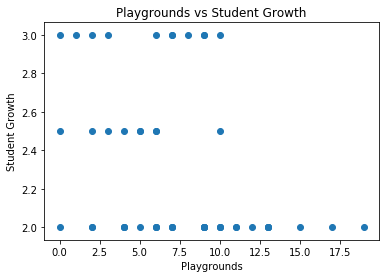

In [31]:
plt.scatter(growth_df['No_of_Playgrounds'], growth_df['Student_Growth_Median'])
plt.title('Playgrounds vs Student Growth')
plt.xlabel('Playgrounds')
plt.ylabel('Student Growth')
plt.show()

# When in doubt, add more data!

### Lets add School Profile Info

In [32]:
prof_df.head()

,School_ID,Legacy_Unit_ID,Finance_ID,Short_Name,Long_Name,Primary_Category,Is_High_School,Is_Middle_School,Is_Elementary_School,Is_Pre_School,...,Sixth_Contact_Name,Seventh_Contact_Title,Seventh_Contact_Name,Network,Is_GoCPS_Participant,Is_GoCPS_PreK,Is_GoCPS_Elementary,Is_GoCPS_High_School,Open_For_Enrollment_Date,Closed_For_Enrollment_Date
0,610191,6070,29291,STONE,Stone Elementary Scholastic Academy,ES,False,True,True,False,...,NaN,NaN,NaN,Network 2,True,False,True,False,09/01/2004 12:00:00 AM,NaN
1,609799,2270,22231,BELL,Alexander Graham Bell Elementary School,ES,False,True,True,False,...,NaN,NaN,NaN,Network 4,True,False,True,False,09/01/2004 12:00:00 AM,NaN
2,609786,2130,22101,AVALON PARK,Avalon Park Elementary School,ES,False,True,True,True,...,NaN,NaN,NaN,ISP,True,False,True,False,09/01/2004 12:00:00 AM,NaN
3,609995,4010,23811,HITCH,Rufus M Hitch Elementary School,ES,False,True,True,True,...,NaN,NaN,NaN,ISP,True,False,True,False,09/01/2004 12:00:00 AM,NaN
4,609766,1920,49081,VAUGHN HS,Jacqueline B Vaughn Occupational High School,HS,True,False,False,False,...,NaN,NaN,NaN,Network 14,False,False,False,False,09/01/2004 12:00:00 AM,NaN


In [34]:
# Filter High Schools only

hs_df = prof_df[prof_df['Is_High_School']==True]


grad_rate = []
college_rate =[]

# Find Values

for zip in zips:
    grad_rate.append((hs_df[hs_df['Zip'] == zip]['Graduation_Rate_School']).median())
    college_rate.append((hs_df[hs_df['Zip'] == zip]['College_Enrollment_Rate_School']).median())

# Assign Values

for zip in zips:
    growth_df.loc[growth_df['Zip']== zip, 'Graduation_Rate'] = grad_rate.pop(0)
    growth_df.loc[growth_df['Zip']== zip, 'College_Enrollment_Rate'] = college_rate.pop(0)
    
growth_df.head()

,Zip,Student_Growth_Min,Student_Growth_Max,Student_Growth_Median,No_of_Playgrounds,Total_Acres,No_of_Bball_Courts,Graduation_Rate,College_Enrollment_Rate
0,60636,0.0,3.0,2.0,6,85.29,8,67.70,34.25
1,60643,0.0,4.0,2.0,13,81.28,12,77.90,52.25
2,60631,1.0,3.0,2.0,6,36.60,3,47.65,53.15
3,60629,1.0,4.0,3.0,6,404.33,6,77.40,68.50
4,60616,1.0,4.0,2.0,15,679.76,12,72.80,24.80


# The Result

### Correlation Table

In [15]:
growth_df.corr(method='pearson')

,Zip,Student_Growth_Min,Student_Growth_Max,Student_Growth_Median,No_of_Playgrounds,Total_Acres,No_of_Bball_Courts,Graduation_Rate,College_Enrollment_Rate
Zip,1.000000,0.035943,-0.107512,0.010308,-0.388990,-0.203384,-0.271794,0.166161,-0.019294
Student_Growth_Min,0.035943,1.000000,-0.110550,0.513534,-0.329829,-0.017297,-0.506799,0.421364,0.265687
Student_Growth_Max,-0.107512,-0.110550,1.000000,0.083100,0.391706,0.068706,0.474538,-0.338645,-0.392805
Student_Growth_Median,0.010308,0.513534,0.083100,1.000000,-0.350212,-0.202550,-0.277402,0.226335,0.246538
No_of_Playgrounds,-0.388990,-0.329829,0.391706,-0.350212,1.000000,0.533477,0.765091,-0.219165,-0.266085
Total_Acres,-0.203384,-0.017297,0.068706,-0.202550,0.533477,1.000000,0.350248,0.029874,0.013350
No_of_Bball_Courts,-0.271794,-0.506799,0.474538,-0.277402,0.765091,0.350248,1.000000,-0.369409,-0.325605
Graduation_Rate,0.166161,0.421364,-0.338645,0.226335,-0.219165,0.029874,-0.369409,1.000000,0.493321
College_Enrollment_Rate,-0.019294,0.265687,-0.392805,0.246538,-0.266085,0.013350,-0.325605,0.493321,1.000000


# Potential Correlations

### Graduation Rate and College Enrollment Rate

Text(0, 0.5, 'College Enrollment Rate')

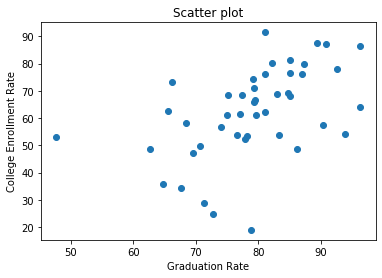

In [16]:
plt.scatter(growth_df['Graduation_Rate'],growth_df['College_Enrollment_Rate'])
plt.title('Scatter plot')
plt.xlabel('Graduation Rate')
plt.ylabel('College Enrollment Rate')


### No. of Basektball Courts and No. of Playgrounds

Text(0, 0.5, 'Playgrounds')

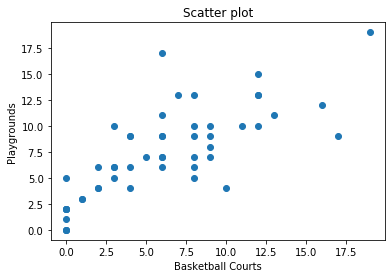

In [17]:
plt.scatter(growth_df['No_of_Bball_Courts'],growth_df['No_of_Playgrounds'])
plt.title('Scatter plot')
plt.xlabel('Basketball Courts')
plt.ylabel('Playgrounds')

# Questions?